## Importing Required Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Importing and Loading Dataset

In [2]:
data=pd.read_csv(r"C:\Users\dhyey\OneDrive\Desktop\DATA\Datasets\housing\housing.csv")

In [3]:
print(data.count())

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64


## Feature Engineering

In [4]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
data['ocean_proximity']=OrdinalEncoder().fit_transform(data[['ocean_proximity']])

In [6]:
print(data['ocean_proximity'].unique())

[3. 0. 1. 4. 2.]


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB
None


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB
None


In [9]:
data['total_bedrooms']=SimpleImputer(strategy='mean').fit_transform(data[['total_bedrooms']])

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB
None


In [11]:
data['ocean_proximity'].value_counts()

ocean_proximity
0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

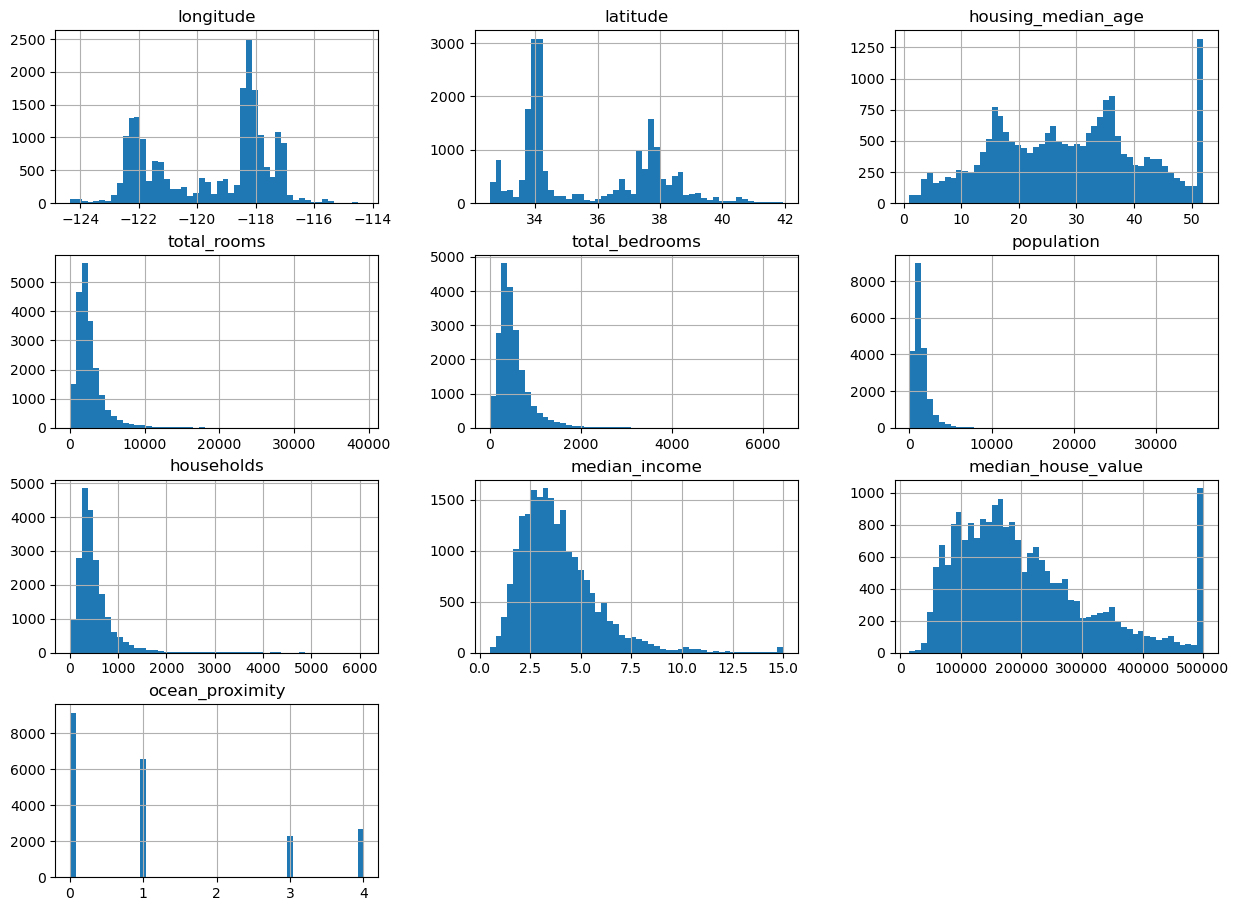

In [12]:
data.hist(bins=50,figsize=(15,11))
plt.show()


In [13]:
train,test=train_test_split(data,random_state=42,test_size=0.2)


In [14]:
print(train.count())

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
median_house_value    16512
ocean_proximity       16512
dtype: int64


In [15]:
print(test.count())

longitude             4128
latitude              4128
housing_median_age    4128
total_rooms           4128
total_bedrooms        4128
population            4128
households            4128
median_income         4128
median_house_value    4128
ocean_proximity       4128
dtype: int64


In [16]:
print(16512/4128) 

4.0


In [17]:
print(16512/4128) 

4.0


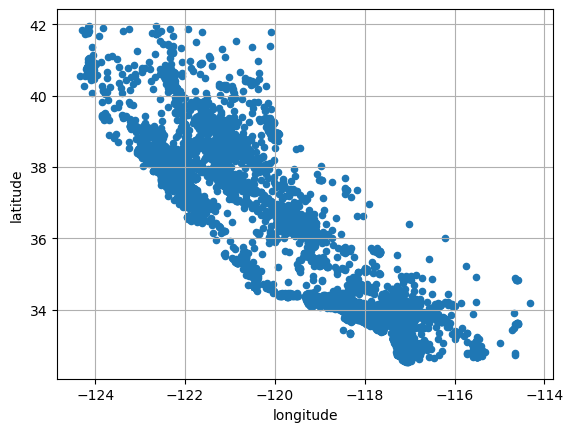

In [18]:
train.plot(kind="scatter",x="longitude",y="latitude",grid="true")
plt.show()

In [19]:
print(train.corr()["median_house_value"])

longitude            -0.043603
latitude             -0.146324
housing_median_age    0.104714
total_rooms           0.134060
total_bedrooms        0.049798
population           -0.025820
households            0.065798
median_income         0.687013
median_house_value    1.000000
ocean_proximity       0.081015
Name: median_house_value, dtype: float64


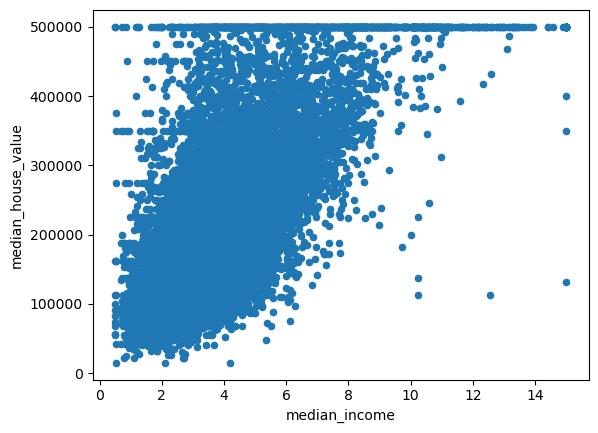

In [20]:
train.plot(y="median_house_value",x="median_income",kind="scatter")
plt.show()

## Model Training and Evaluations

In [21]:
model=LinearRegression().fit(train[["median_income"]],train[["median_house_value"]])

In [22]:
print(model.intercept_[0])

46369.63681332639
